In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from PIL import Image
import cv2
import random
from utils import *

In [ ]:
model_path = 'models/exp28/model_best.pt'
model = load_unet_vgg16_bn_do(model_path)

In [5]:
img = cv2.imread('/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/minimal_06/test/images/cracktree200_6583.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
# preprocess

width, height = 448, 448
train_tfms = transforms.Compose([transforms.Resize((width, height)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
tensor = train_tfms(Image.fromarray(img))
if tensor.ndimension() == 3:
    tensor = tensor.unsqueeze(0)

# feature map visualization
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
model.conv2.register_forward_hook(get_activation('conv2'))
model.conv3.register_forward_hook(get_activation('conv3'))
model.conv4.register_forward_hook(get_activation('conv4'))
model.conv5.register_forward_hook(get_activation('conv5'))

model.eval()
with torch.no_grad():
    output = model(tensor.cuda())

In [15]:
act = activation['conv5'].cpu().squeeze()
print(act.size())
random.shuffle(act)
act = act[:64]

torch.Size([512, 28, 28])


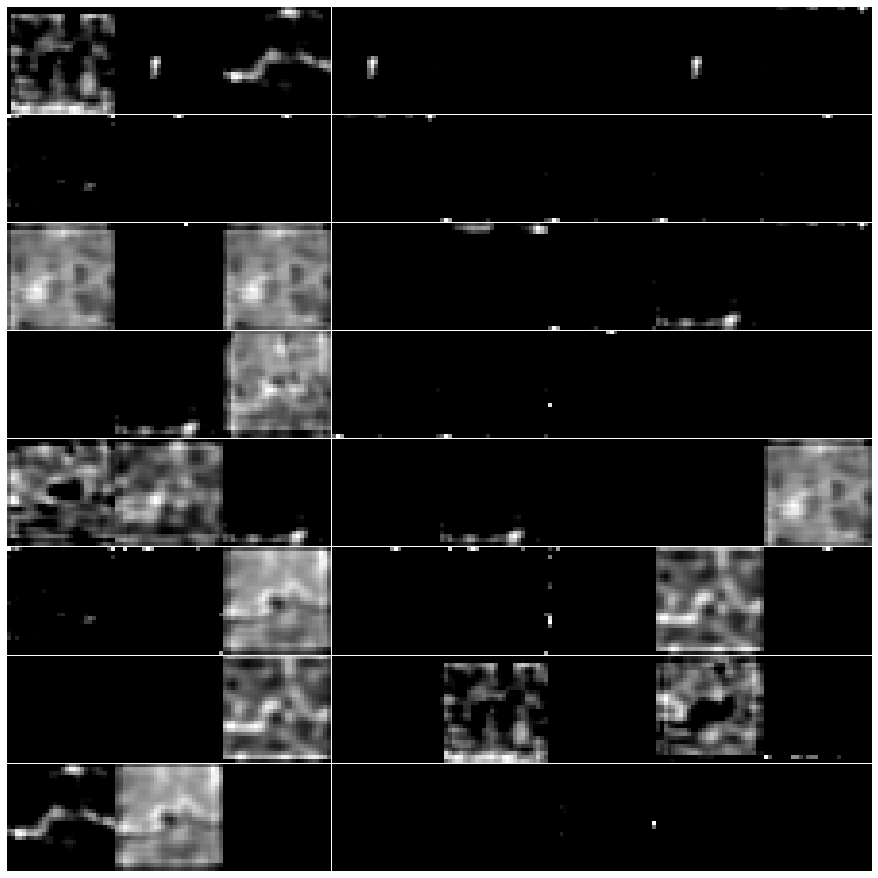

In [16]:
rows, cols = 8, 8
fig = plt.figure(figsize=(12,12))

for idx in range(act.size(0)):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.axis('off')
    ax.imshow(act[idx], cmap='gray')
    
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0.01, wspace=0.01)
plt.savefig('FM.png')
plt.show()

# code

In [ ]:
# how to visualize the feature map in pytorch
# reference) https://discuss.pytorch.org/t/visualize-feature-map/29597/2

# definition the function
# hook: forward, backward,혹은 그전에 pytorch의 함수에서 특정한 로직을 부여할 수 있는 함수
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# use below method to the layer you want to see
model.conv1.register_forward_hook(get_activation('conv1'))
model.conv2.register_forward_hook(get_activation('conv2'))
model.conv3.register_forward_hook(get_activation('conv3'))
model.conv4.register_forward_hook(get_activation('conv4'))
model.conv5.register_forward_hook(get_activation('conv5'))

# inference
model.eval()
with torch.no_grad():
    output = model(tensor.cuda())

# assign the feature map to varible
act1 = activation['conv5'].cpu().squeeze()
act2 = activation['conv5'].cpu().squeeze()
act3 = activation['conv5'].cpu().squeeze()
act4 = activation['conv5'].cpu().squeeze()
act5 = activation['conv5'].cpu().squeeze()